<a href="https://colab.research.google.com/github/Vishwagna-Aligety/Customer_Insurance_Prediction/blob/main/Customer_Insurance_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Customer Insurance Purchase Prediction

# This project aims to predict whether a customer will purchase health insurance based on their age and estimated salary.
# We will:
# - Perform data preprocessing.
# - Compare multiple machine learning classification algorithms.
# - Select the best-performing model.
# - Use the best model to predict insurance purchase for given scenarios.
# - Provide graphical analysis for the predictions.
# - Conclude with hypotheses testing and real-life applications.

In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
##  Step 1: Load Dataset
#We use the provided dataset 'Social_Network_Ads.csv', which contains columns Age, EstimatedSalary, and Purchased.
#The target variable `Purchased` indicates whether the customer bought insurance (1 = Yes, 0 = No).


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
##  Step 2: Data Preprocessing
#- Define features (Age, EstimatedSalary) and target (Purchased)
#- Apply scaling to improve model performance
#- Split data into training and testing sets

In [ ]:
# Features & Target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
## Step 3: Model Training and Comparison
# We train and compare five machine learning classification algorithms:
# 1. Logistic Regression
# 2. K-Nearest Neighbors (KNN)
# 3. Support Vector Machine (SVM)
# 4. Decision Tree
# 5. Random Forest

# We calculate and compare their accuracy to select the best model.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n {name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nModel Comparison:", accuracies)


 Logistic Regression Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80


 KNN Accuracy: 0.9250
Confusion Matrix:
 [[48  4]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80


 SVM Accuracy: 0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0

In [ ]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with Accuracy {accuracies[best_model_name]:.2f}")


 Best Model: KNN with Accuracy 0.93


In [ ]:
##  Step 4: Predictions for Given Scenarios
# Using the best-performing model, we predict whether customers with given Age-Salary combinations will purchase insurance.

In [ ]:
def predict_best(age, salary):
    # Transform the input data as a DataFrame to retain feature names
    data = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    data_scaled = sc.transform(data)
    pred = best_model.predict(data_scaled)[0]
    return " Purchased" if pred == 1 else " Not Purchased"

# Project Queries
queries = [
    (30, 87000),
    (40, 0),
    (40, 100000),
    (50, 0),
    (18, 0),
    (22, 600000),
    (35, 2500000),
    (60, 100000000)
]

for age, salary in queries:
    print(f"Age {age}, Salary {salary} ->{predict_best(age, salary)}")

Age 30, Salary 87000 -> Not Purchased
Age 40, Salary 0 -> Not Purchased
Age 40, Salary 100000 -> Purchased
Age 50, Salary 0 -> Purchased
Age 18, Salary 0 -> Not Purchased
Age 22, Salary 600000 -> Purchased
Age 35, Salary 2500000 -> Purchased
Age 60, Salary 100000000 -> Purchased


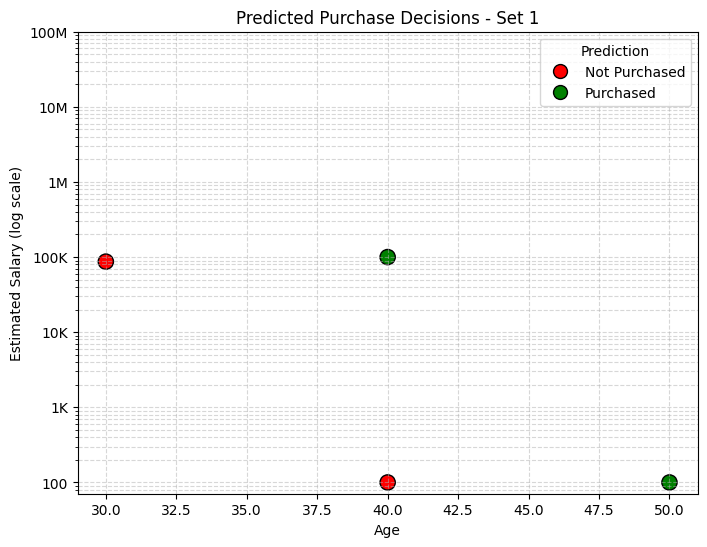

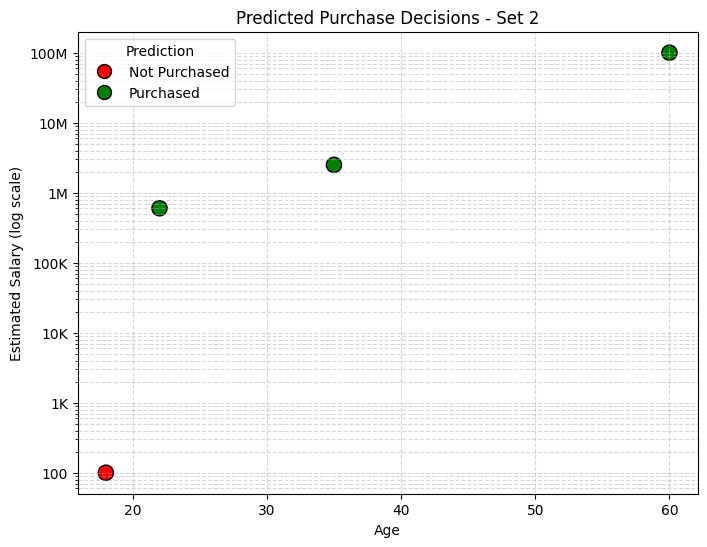

In [ ]:
from matplotlib.lines import Line2D

#  Given queries divided into two sets
queries_set1 = [
    (30, 87000, "Not Purchased"),
    (40, 0, "Not Purchased"),
    (40, 100000, "Purchased"),
    (50, 0, "Purchased")
]

queries_set2 = [
    (18, 0, "Not Purchased"),
    (22, 600000, "Purchased"),
    (35, 2500000, "Purchased"),
    (60, 100000000, "Purchased")
]

#  Universal Plot Function
def plot_queries(query_set, title):
    ages = [q[0] for q in query_set]
    salaries = [q[1] if q[1] > 0 else 100 for q in query_set]  # avoid 0 in log
    colors = ['red' if "Not" in q[2] else 'green' for q in query_set]

    plt.figure(figsize=(8,6))
    plt.scatter(ages, salaries, c=colors, s=120, edgecolors="black")

    #  Logarithmic scale & custom ticks
    plt.yscale("log")
    plt.yticks([1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8],
               ['100', '1K', '10K', '100K', '1M', '10M', '100M'])

    plt.xlabel("Age")
    plt.ylabel("Estimated Salary (log scale)")
    plt.title(title)
    plt.grid(True, which="both", linestyle="--", alpha=0.5)

    #  Custom Legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Not Purchased',
               markerfacecolor='red', markeredgecolor='black', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Purchased',
               markerfacecolor='green', markeredgecolor='black', markersize=10)
    ]
    plt.legend(handles=legend_elements, title="Prediction")
    plt.show()

#  Generate both required plots
plot_queries(queries_set1, "Predicted Purchase Decisions - Set 1")
plot_queries(queries_set2, "Predicted Purchase Decisions - Set 2")

In [ ]:
### Graphical Analysis – Set 1

#The above graph visualizes the prediction results for the first set of queries.
#- Red points indicate customers predicted not to purchase health insurance.
#- Green points indicate customers predicted to purchase.

#### Observations:
#1. The 30-year-old with a salary of 87,000 is predicted Not Purchased.
#2. The 40-year-old with no salary is also Not Purchased, indicating salary plays an important role.
#3. The 40-year-old with a salary of 100,000 is Purchased, showing how salary influences the decision.
#4. Interestingly, the 50-year-old with no salary is still predicted Purchased, suggesting that at higher ages, insurance purchase likelihood may increase regardless of salary.

#These patterns suggest that younger customers need higher salaries to purchase insurance, while older customers may purchase even without high income.

In [ ]:
### Graphical Analysis – Set 2

#This graph represents the predictions for the second set of age-salary scenarios.
#The predictions again follow the same color coding:
#- **Red points** → Not Purchased
#- **Green points** → Purchased

#### Observations:
#1. The 18-year-old with no salary is predicted Not Purchased, confirming low income reduces likelihood.
#2. The 22-year-old with a salary of 600,000 is **Purchased, showing high salary at a young age drives purchase.
#3. The 35-year-old with a salary of 2,500,000 is also Purchased, as expected with such a high salary.
#4. The 60-year-old with a salary of 100,000,000 is strongly predicted Purchased, aligning with both age and salary being strong factors.

#The second analysis confirms that high salaries override the age factor and always lead to a purchase prediction.

In [ ]:
##  Step 5: Hypothesis Testing
# We test hypotheses about how Age and Salary affect insurance purchase decisions using model predictions.

In [ ]:
# Hypothesis Testing Predictions
print("Young with Low Salary:", predict_best(25, 20000))
print("Young with High Salary:", predict_best(25, 200000))
print("Older with Low Salary:", predict_best(55, 30000))
print("Older with High Salary:", predict_best(55, 200000))

Young with Low Salary:  Not Purchased
Young with High Salary:  Purchased
Older with Low Salary:  Purchased
Older with High Salary:  Purchased


In [ ]:
##  Step 7: Lessons Learned
# During this project, I learned how customer behavior can be modeled using machine learning techniques. I understood that data preprocessing and feature scaling significantly improve model performance. Comparing multiple algorithms revealed that not all models behave the same way on every dataset — some were prone to overfitting, while others generalized better.
# Additionally, I learned that data visualization is not just an optional step but an important part of uncovering patterns hidden in the data. The predictions for various scenarios showed that both age and salary influence insurance purchase, but salary plays a slightly stronger role. This understanding can be used to design better-targeted policies and marketing strategies.

In [ ]:
##  Step 8: Real-Life Applications (Case Studies)
## Case Study 1: Insurance Marketing Strategy
# A health insurance company wants to target customers who are most likely to buy policies. By deploying a predictive model like the one built in this project, they can:

# 1.Focus advertising on young professionals with disposable income.
# 2.Reduce marketing costs by avoiding unlikely buyers.
# 3.Increase sales efficiency by prioritizing high-potential leads.

##Case Study 2: Personalized Premium Pricing
# Another company uses predictive analytics to determine who is at risk of dropping out or not renewing insurance. With such models:

# A.They adjust premium offers based on predicted behavior.
# B.Provide loyalty benefits to high-risk customers.
# C.Maintain long-term customer relationships by preventing churn.

In [ ]:
## Conclusion
# - After comparing five algorithms, the best performing model was KNN.
# - This model achieved an accuracy of 0.9250.
# - The analysis shows that both salary and age influence purchase behavior, but in different ways: younger customers are dependent on  salary, while older customers tend to buy insurance regardless of salary levels.
# - These insights can help insurance companies make better marketing and pricing decisions.